SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION ANALYSIS
Dataset: Synthetic 2D Dataset
Dataset shape: (300, 2)
Class distribution: [150 150]

Training Linear SVM...
Training RBF SVM...

============================== MODEL EVALUATION ==============================

Linear SVM Results:
Training Accuracy: 0.9190
Test Accuracy: 0.9444
CV Accuracy: 0.9095 (+/- 0.1017)

RBF SVM Results:
Training Accuracy: 0.9667
Test Accuracy: 0.9667
CV Accuracy: 0.9619 (+/- 0.0571)


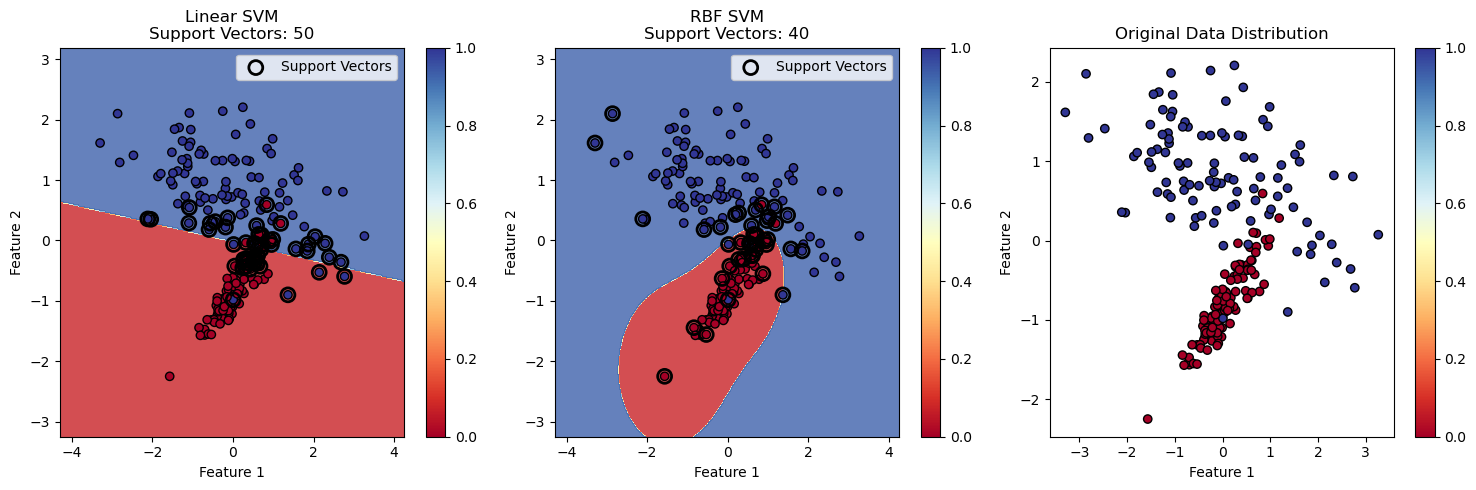


==================== HYPERPARAMETER TUNING ====================
Tuning Linear SVM...
Best Linear SVM parameters: {'C': 1}
Best Linear SVM CV score: 0.9095

Tuning RBF SVM...
Best RBF SVM parameters: {'C': 1, 'gamma': 'scale'}
Best RBF SVM CV score: 0.9619

Best overall model: RBF SVM


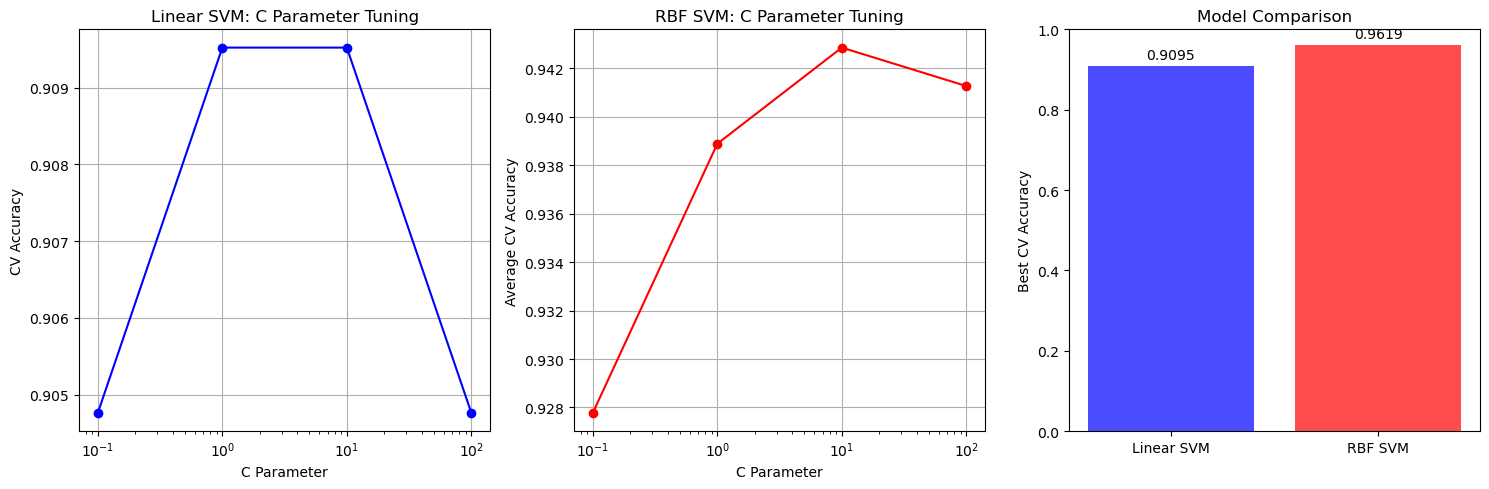


==================== FINAL MODEL EVALUATION ====================
Final Test Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.98      0.96      0.97        45

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



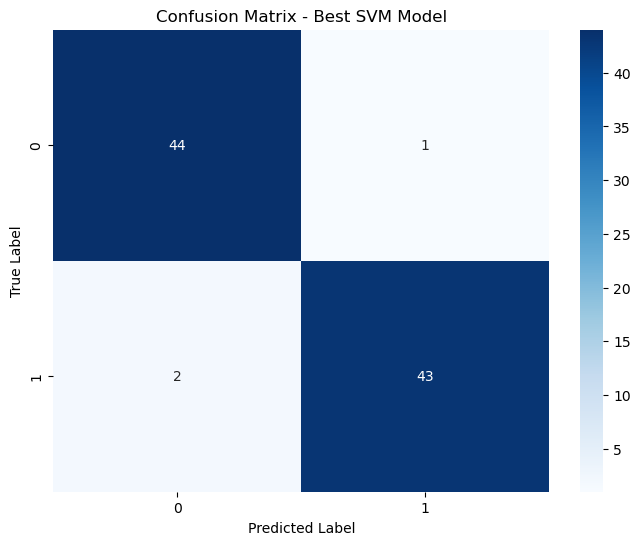


ANALYSIS COMPLETE!
Generated files:
- svm_decision_boundaries.png
- hyperparameter_analysis.png
- confusion_matrix.png


In [1]:
# Support Vector Machine (SVM) Implementation
# Task 7: AI & ML Internship

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

class SVMClassifier:
    """
    A comprehensive SVM implementation class for binary classification
    with visualization and hyperparameter tuning capabilities.
    """
    
    def __init__(self):
        self.scaler = StandardScaler()
        self.linear_svm = None
        self.rbf_svm = None
        self.best_svm = None
        
    def load_and_prepare_data(self, dataset_type='breast_cancer'):
        """
        Load and prepare dataset for binary classification
        
        Args:
            dataset_type (str): Type of dataset to load ('breast_cancer' or 'synthetic')
        """
        if dataset_type == 'breast_cancer':
            # Load Breast Cancer Dataset
            data = load_breast_cancer()
            self.X = data.data[:, :2]  # Using first 2 features for visualization
            self.y = data.target
            self.feature_names = data.feature_names[:2]
            print("Dataset: Breast Cancer Dataset (Wisconsin)")
            print(f"Features used: {self.feature_names}")
            
        else:
            # Create synthetic dataset for better visualization
            self.X, self.y = make_classification(
                n_samples=300, 
                n_features=2, 
                n_redundant=0, 
                n_informative=2,
                n_clusters_per_class=1, 
                random_state=42
            )
            self.feature_names = ['Feature 1', 'Feature 2']
            print("Dataset: Synthetic 2D Dataset")
            
        print(f"Dataset shape: {self.X.shape}")
        print(f"Class distribution: {np.bincount(self.y)}")
        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.3, random_state=42, stratify=self.y
        )
        
        # Scale the features
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        
    def train_svm_models(self):
        """Train SVM models with different kernels"""
        
        # Linear SVM
        print("\n" + "="*50)
        print("Training Linear SVM...")
        self.linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
        self.linear_svm.fit(self.X_train_scaled, self.y_train)
        
        # RBF SVM
        print("Training RBF SVM...")
        self.rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
        self.rbf_svm.fit(self.X_train_scaled, self.y_train)
        
        # Evaluate both models
        self._evaluate_models()
        
    def _evaluate_models(self):
        """Evaluate the trained models"""
        
        print("\n" + "="*30 + " MODEL EVALUATION " + "="*30)
        
        # Linear SVM evaluation
        linear_train_acc = self.linear_svm.score(self.X_train_scaled, self.y_train)
        linear_test_acc = self.linear_svm.score(self.X_test_scaled, self.y_test)
        linear_cv_scores = cross_val_score(self.linear_svm, self.X_train_scaled, self.y_train, cv=5)
        
        print(f"\nLinear SVM Results:")
        print(f"Training Accuracy: {linear_train_acc:.4f}")
        print(f"Test Accuracy: {linear_test_acc:.4f}")
        print(f"CV Accuracy: {linear_cv_scores.mean():.4f} (+/- {linear_cv_scores.std() * 2:.4f})")
        
        # RBF SVM evaluation
        rbf_train_acc = self.rbf_svm.score(self.X_train_scaled, self.y_train)
        rbf_test_acc = self.rbf_svm.score(self.X_test_scaled, self.y_test)
        rbf_cv_scores = cross_val_score(self.rbf_svm, self.X_train_scaled, self.y_train, cv=5)
        
        print(f"\nRBF SVM Results:")
        print(f"Training Accuracy: {rbf_train_acc:.4f}")
        print(f"Test Accuracy: {rbf_test_acc:.4f}")
        print(f"CV Accuracy: {rbf_cv_scores.mean():.4f} (+/- {rbf_cv_scores.std() * 2:.4f})")
        
    def visualize_decision_boundary(self, model, title, subplot_pos):
        """
        Visualize decision boundary for 2D data
        
        Args:
            model: Trained SVM model
            title (str): Plot title
            subplot_pos: Subplot position
        """
        
        plt.subplot(subplot_pos)
        
        # Create a mesh
        h = 0.02
        x_min, x_max = self.X_train_scaled[:, 0].min() - 1, self.X_train_scaled[:, 0].max() + 1
        y_min, y_max = self.X_train_scaled[:, 1].min() - 1, self.X_train_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        
        # Make predictions on mesh
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
        
        # Plot data points
        scatter = plt.scatter(self.X_train_scaled[:, 0], self.X_train_scaled[:, 1], 
                            c=self.y_train, cmap=plt.cm.RdYlBu, edgecolors='black')
        
        # Plot support vectors
        if hasattr(model, 'support_vectors_'):
            plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                       s=100, facecolors='none', edgecolors='black', linewidth=2,
                       label='Support Vectors')
            plt.legend()
        
        plt.xlabel(self.feature_names[0])
        plt.ylabel(self.feature_names[1])
        plt.title(f'{title}\nSupport Vectors: {len(model.support_vectors_)}')
        plt.colorbar(scatter)
        
    def plot_decision_boundaries(self):
        """Plot decision boundaries for both models"""
        
        plt.figure(figsize=(15, 5))
        
        # Linear SVM
        self.visualize_decision_boundary(self.linear_svm, 'Linear SVM', 131)
        
        # RBF SVM
        self.visualize_decision_boundary(self.rbf_svm, 'RBF SVM', 132)
        
        # Data distribution
        plt.subplot(133)
        plt.scatter(self.X_train_scaled[:, 0], self.X_train_scaled[:, 1], 
                   c=self.y_train, cmap=plt.cm.RdYlBu, edgecolors='black')
        plt.xlabel(self.feature_names[0])
        plt.ylabel(self.feature_names[1])
        plt.title('Original Data Distribution')
        plt.colorbar()
        
        plt.tight_layout()
        plt.savefig('svm_decision_boundaries.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    def hyperparameter_tuning(self):
        """Perform hyperparameter tuning using GridSearchCV"""
        
        print("\n" + "="*20 + " HYPERPARAMETER TUNING " + "="*20)
        
        # Define parameter grids
        linear_params = {
            'C': [0.1, 1, 10, 100]
        }
        
        rbf_params = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        }
        
        # Grid search for Linear SVM
        print("Tuning Linear SVM...")
        linear_grid = GridSearchCV(
            SVC(kernel='linear', random_state=42),
            linear_params, cv=5, scoring='accuracy', n_jobs=-1
        )
        linear_grid.fit(self.X_train_scaled, self.y_train)
        
        print(f"Best Linear SVM parameters: {linear_grid.best_params_}")
        print(f"Best Linear SVM CV score: {linear_grid.best_score_:.4f}")
        
        # Grid search for RBF SVM
        print("\nTuning RBF SVM...")
        rbf_grid = GridSearchCV(
            SVC(kernel='rbf', random_state=42),
            rbf_params, cv=5, scoring='accuracy', n_jobs=-1
        )
        rbf_grid.fit(self.X_train_scaled, self.y_train)
        
        print(f"Best RBF SVM parameters: {rbf_grid.best_params_}")
        print(f"Best RBF SVM CV score: {rbf_grid.best_score_:.4f}")
        
        # Select best model
        if linear_grid.best_score_ > rbf_grid.best_score_:
            self.best_svm = linear_grid.best_estimator_
            best_type = "Linear"
        else:
            self.best_svm = rbf_grid.best_estimator_
            best_type = "RBF"
            
        print(f"\nBest overall model: {best_type} SVM")
        
        return linear_grid, rbf_grid
        
    def final_evaluation(self):
        """Final evaluation of the best model"""
        
        if self.best_svm is None:
            print("Please run hyperparameter tuning first!")
            return
            
        print("\n" + "="*20 + " FINAL MODEL EVALUATION " + "="*20)
        
        # Predictions
        y_pred = self.best_svm.predict(self.X_test_scaled)
        
        # Metrics
        accuracy = accuracy_score(self.y_test, y_pred)
        print(f"Final Test Accuracy: {accuracy:.4f}")
        
        # Classification Report
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(self.y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix - Best SVM Model')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    def plot_hyperparameter_analysis(self, linear_grid, rbf_grid):
        """Plot hyperparameter analysis results"""
        
        plt.figure(figsize=(15, 5))
        
        # Linear SVM C parameter analysis
        plt.subplot(131)
        linear_results = linear_grid.cv_results_
        C_values = [params['C'] for params in linear_results['params']]
        scores = linear_results['mean_test_score']
        plt.semilogx(C_values, scores, 'bo-')
        plt.xlabel('C Parameter')
        plt.ylabel('CV Accuracy')
        plt.title('Linear SVM: C Parameter Tuning')
        plt.grid(True)
        
        # RBF SVM C parameter analysis
        plt.subplot(132)
        rbf_results = rbf_grid.cv_results_
        # Group by C values
        c_gamma_scores = {}
        for i, params in enumerate(rbf_results['params']):
            c = params['C']
            if c not in c_gamma_scores:
                c_gamma_scores[c] = []
            c_gamma_scores[c].append(rbf_results['mean_test_score'][i])
        
        c_vals = sorted(c_gamma_scores.keys())
        avg_scores = [np.mean(c_gamma_scores[c]) for c in c_vals]
        plt.semilogx(c_vals, avg_scores, 'ro-')
        plt.xlabel('C Parameter')
        plt.ylabel('Average CV Accuracy')
        plt.title('RBF SVM: C Parameter Tuning')
        plt.grid(True)
        
        # Model comparison
        plt.subplot(133)
        models = ['Linear SVM', 'RBF SVM']
        best_scores = [linear_grid.best_score_, rbf_grid.best_score_]
        bars = plt.bar(models, best_scores, color=['blue', 'red'], alpha=0.7)
        plt.ylabel('Best CV Accuracy')
        plt.title('Model Comparison')
        plt.ylim(0, 1)
        
        # Add value labels on bars
        for bar, score in zip(bars, best_scores):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{score:.4f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.savefig('hyperparameter_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

def main():
    """Main function to run the complete SVM analysis"""
    
    print("="*60)
    print("SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION ANALYSIS")
    print("="*60)
    
    # Initialize classifier
    svm_classifier = SVMClassifier()
    
    # Load and prepare data
    svm_classifier.load_and_prepare_data('synthetic')  # Use 'breast_cancer' for real dataset
    
    # Train initial models
    svm_classifier.train_svm_models()
    
    # Visualize decision boundaries
    svm_classifier.plot_decision_boundaries()
    
    # Hyperparameter tuning
    linear_grid, rbf_grid = svm_classifier.hyperparameter_tuning()
    
    # Plot hyperparameter analysis
    svm_classifier.plot_hyperparameter_analysis(linear_grid, rbf_grid)
    
    # Final evaluation
    svm_classifier.final_evaluation()
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE!")
    print("Generated files:")
    print("- svm_decision_boundaries.png")
    print("- hyperparameter_analysis.png") 
    print("- confusion_matrix.png")
    print("="*60)

if __name__ == "__main__":
    main()


  